In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sigproc_kit import *
import rigol_DG4202 as awg
import random

In [2]:
awg.open_session("192.168.0.104")  #MTrax pulser
#awg.open_session("192.168.0.221") #MichaW's pulser

connect to device ...
*IDN?
Rigol Technologies,DG4202,DG4E214001987,00.01.14
success!


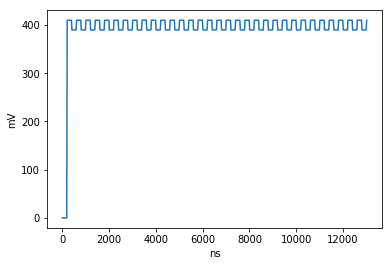

In [3]:
##################################################
##               arbitrary pulse                ##
##################################################


period = 30e-6


#x = np.arange(0,period,1e-9)

#amplitude_pkpk = 100e-3
amplitude_pkpk = 10e-3
offset         = 0.4
min_step       = 10e-3

#steps = 128
steps = 65

last_v = 0

x = [0]
y = [last_v]

step_width = 200e-9

edge = 20e-9



for i in range(1,steps+1):

  x += [i*step_width-edge/2]
  y += [last_v]

    
  new_v = 0
  while True:
#    new_v = amplitude_pkpk * ((random.random()-0.5)) +offset
    new_v = amplitude_pkpk * (-1)**(i+1) +offset
    if (abs(last_v-new_v)>min_step):
      break
  if(i == steps):
    new_V = 0
    
  x += [i*step_width+edge/2]
  y += [new_v]
  
  last_v = new_v
  

x = np.array(x)
y = np.array(y)






plt.plot(x*1e9,y*1e3)
plt.xlabel("ns")
plt.ylabel("mV")
plt.show()

awg.program_trace(x,y,trace=1,period=period)